<a href="https://colab.research.google.com/github/RandAlsalman8/IR-Project/blob/main/Antique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install The Dataset

In [10]:
pip install ir_datasets

# Install the autocorrect package

In [2]:
pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=a6d08019aa70991a8dc142d422df10c994d53ad4afe669e0fc6707a65f5950b8
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


# Import necessary libraries

In [3]:
import ir_datasets
import pandas as pd
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
import string
import re
from nltk.tokenize import word_tokenize
from autocorrect import Speller
spell = Speller(lang='en')
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Connecting To My Drive

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the dataset

In [11]:
import ir_datasets
dataset = ir_datasets.load("antique/train")

for doc in dataset.docs_iter():
    print(doc)
    break
for query in dataset.queries_iter():
    print(query)
    break

[INFO] Please confirm you agree to the authors' data usage agreement found at <https://ciir.cs.umass.edu/downloads/Antique/readme.txt>
[INFO] If you have a local copy of https://ciir.cs.umass.edu/downloads/Antique/antique-collection.txt, you can symlink it here to avoid downloading it again: /root/.ir_datasets/downloads/684f7015aff377062a758e478476aac8
[INFO] [starting] https://ciir.cs.umass.edu/downloads/Antique/antique-collection.txt
[INFO] [finished] https://ciir.cs.umass.edu/downloads/Antique/antique-collection.txt: [00:01] [93.6MB] [55.6MB/s]


GenericDoc(doc_id='2020338_0', text="A small group of politicians believed strongly that the fact that Saddam Hussien remained in power after the first Gulf War was a signal of weakness to the rest of the world, one that invited attacks and terrorism. Shortly after taking power with George Bush in 2000 and after the attack on 9/11, they were able to use the terrorist attacks to justify war with Iraq on this basis and exaggerated threats of the development of weapons of mass destruction. The military strength of the U.S. and the brutality of Saddam's regime led them to imagine that the military and political victory would be relatively easy.")


[INFO] [starting] https://ciir.cs.umass.edu/downloads/Antique/antique-train-queries.txt
[INFO] [finished] https://ciir.cs.umass.edu/downloads/Antique/antique-train-queries.txt: [00:00] [137kB] [1.26MB/s]
                                                                                                 

GenericQuery(query_id='3097310', text='What causes severe swelling and pain in the knees?')


# Convert Docs, Queries and Qrels to CSV

In [ ]:
# Read docs, queries and qrels as DataFrame
queries = pd.DataFrame(dataset.queries_iter())
docs = pd.DataFrame(dataset.docs)
qrels = pd.DataFrame(dataset.qrels_iter())

# Convert docs, queries and qrels to CSV
queries.to_csv("originalantique_queries.csv", index=False)
docs.to_csv("originalantique_docs.csv", index=False)
qrels.to_csv("originalantique_qrels.csv", index=False)

[INFO] [starting] https://ciir.cs.umass.edu/downloads/Antique/antique-train.qrel
[INFO] [finished] https://ciir.cs.umass.edu/downloads/Antique/antique-train.qrel: [00:00] [626kB] [3.95MB/s]


# Saving my files to drive

In [ ]:
# Specify the path in Google Drive where you want to save the file
original_docs_path = '/content/drive/My Drive/originalantique_docs.csv'
original_qrels_path = '/content/drive/My Drive/originalantique_qrels.csv'
original_queries_path = '/content/drive/My Drive/originalantique_queries.csv'

docs.to_csv(original_docs_path, index=True, index_label='id')
qrels.to_csv(original_qrels_path, index=True, index_label='id')
queries.to_csv(original_queries_path, index=True, index_label='id')


# Text Processing

In [6]:
def dataProcessing(dfText):
    # spell correct
    texts = " ".join([spell(w)for w in (word_tokenize(str(dfText)))])
    # To lower case
    texts = dfText.str.lower()

    # Remove punctuation
    trans_table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    texts = [str(word).translate(trans_table) for word in texts]

    # Remove stopwrods
    stop_words = set(stopwords.words('english'))
    texts = [[word for word in q.split() if word not in stop_words] for q in texts]

    # Lemmatize text
    lemmatizer = WordNetLemmatizer()
    lemmatized_strings = []
    for text in texts:
        words = word_tokenize(str(text))
        lemmatized_words = []
        for word in text:
            x = pos_tag([word])
            my_pos = wordnet.NOUN
            if x[0][1][0].lower() == 'v':
                my_pos = wordnet.VERB
            lemmatized_words.append(lemmatizer.lemmatize(word, pos = my_pos))
        lemmatized_strings.append(' '.join(lemmatized_words))
    texts = lemmatized_strings


    # Remove Non-alphanumeric Characters
    texts = [re.compile('[^a-zA-Z0-9\s]').sub('', str(word)) for word in texts]

    return texts

# Processing Docs

In [ ]:
docs= pd.read_csv("originalantique_docs.csv")

docs['text'] = dataProcessing(docs['text'])
docs.to_csv('clean2_docs.csv', index=True, index_label='id')

      doc_id                                               text
0  2020338_0  A small group of politicians believed strongly...
1  2020338_1             Because there is a lot of oil in Iraq.
2  2020338_2  It is tempting to say that the US invaded Iraq...
3  2020338_3  I think Yuval is pretty spot on. It's a provin...
4  2874684_0  Call an area apiarist.  They should be able to...


#Processing Queries

In [ ]:
queries = pd.read_csv("originalantique_queries.csv")

queries['text'] = dataProcessing(queries['text'])
queries.to_csv('clean2_queries.csv', index=True, index_label='id')

In [ ]:

clean_docs_path = '/content/drive/My Drive/clean2_docs.csv'
clean_queries_path = '/content/drive/My Drive/clean2_queries.csv'
# Save the DataFrame to a CSV file in Google Drive
docs.to_csv(clean_docs_path, index=True, index_label='id')
queries.to_csv(clean_queries_path, index=True, index_label='id')



#TF-IDF

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
from google.colab import drive
import pandas as pd


drive.mount('/content/drive')

# Specify the path in Google Drive where you want to save the file
original_docs_path = '/content/drive/My Drive/originalantique_docs.csv'
original_qrels_path = '/content/drive/My Drive/originalantique_qrels.csv'
original_queries_path = '/content/drive/My Drive/originalantique_queries.csv'
clean_docs_path = '/content/drive/My Drive/clean2_docs.csv'
clean_queries_path = '/content/drive/My Drive/clean2_queries.csv'


clean_docs = pd.read_csv(clean_docs_path)
clean_docs = clean_docs.fillna('')
print(clean_docs['text'].tolist()[:10]);
full_docs = pd.read_csv(original_docs_path)
full_docs = full_docs.fillna('')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['small group politician believe strongly fact saddam hussien remain power first gulf war signal weakness rest world one invite attack terrorism shortly take power george bush 2000 attack 9 11 able use terrorist attack justify war iraq basis exaggerated threat development weapon mass destruction military strength u brutality saddam regime lead imagine military political victory would relatively easy', 'lot oil iraq', 'tempt say u invade iraq lot oil u country deep economic problem capture countrys oil actual need survival likely iraq invade kuwait scenario would fall assumption think u government come conclusion verge war religion likely ideology would presumptuous try determent one cause come war think world wide spread medium many form cable satellite internet etc push moslem regime extreme fear secularity democratic influence penetrate country result raise

#INDEXING CLEAN DOCS

In [9]:
index = {}
itr = 0
for doc in clean_docs.values:
    for word in str(doc[2]).split():
        if word not in index:
            index[word] = []
        index[word].append(itr)
    itr = itr + 1

# Query index (get relevant docs to query)

In [13]:

vectorizer = TfidfVectorizer()
cleaned_document = clean_docs['text'].tolist()
tfidf_matrix = vectorizer.fit_transform(cleaned_document)

save_pkl(vectorizer, "/content/drive/My Drive/AntiqueVectorizer.pkl")
save_pkl(tfidf_matrix, "/content/drive/My Drive/AntiqueMatrix.pkl")

In [14]:
cleaned_queries = pd.read_csv(clean_queries_path)
docs_names = clean_docs['doc_id'].tolist()

In [15]:
def query_index(query):
    relevant_docs_idx = set()
    for word in query.split():
        if word in index:
            for idx in index[word]:
                relevant_docs_idx.add(idx)
    return relevant_docs_idx

In [5]:
import pickle

def save_pkl(instance , path):
  with open(path,"wb") as f:
    pickle.dump(instance,f)

def load_pkl(path):
    with open(path, "rb") as f:
      return pickle.load(f)

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

#MATCH

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
vectorizer = TfidfVectorizer(stop_words='english')

In [22]:
import numpy as np
import os

vectorizer = load_pkl("/content/drive/My Drive/AntiqueVectorizer.pkl")
names = docs_names
tfidf = load_pkl("/content/drive/My Drive/AntiqueMatrix.pkl")

def getFiles(query):

  cleanedQuery = dataProcessing(query)

  query_tfidf = vectorizer.transform([" ".join(cleanedQuery)])
  vector = query_tfidf.toarray()[0]
  similarity = cosine_similarity(vector.reshape(1,-1),tfidf).flatten()
  sorted_indices = np.argsort(similarity)[::-1]  # Reverse the indices for descending sort
  sorted_documents = [(names[i], similarity[i]) for i in sorted_indices if similarity[i] > 0.3]

  return sorted_documents[:10]


def match():
    queries = dataset.queries
    results = {}

    for query_id,text in dataset.queries_iter():
        results[query_id] = getFiles(pd.Series([text]).astype(str))


    with open("/content/drive/My Drive/AntiqueResults.pkl", 'wb') as file:
        pickle.dump(results, file)

    return
match()


#MAP

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
vectorizer = TfidfVectorizer(stop_words='english')

In [14]:
import numpy as np
import os
def getDocsForQueryById(queryId):

  docs = []
  for value in dataset.qrels_iter():
    if value.query_id==queryId:
      docs.append(value.doc_id)
  return docs

def load_qrels():
    qrels = []
    for value in dataset.qrels_iter():
        qrels.append((value.query_id,value.doc_id, value.relevance))
    return qrels

def calculate_relevant_count(retrieved_docs, query_docs):
    intersect_values = np.intersect1d(retrieved_docs, query_docs)
    matched_count = len(intersect_values)
    return matched_count

def average_precision(retrieved_docs, relevant_docs, k=10):
    total_precisions = 0
    curr_relavant = 1
    if len(relevant_docs) == 0:
        return 0
    if len(retrieved_docs) <= k:
        k = len(retrieved_docs)
    for i in range(k):
        if retrieved_docs[i] in relevant_docs:
            total_precisions += curr_relavant / (i + 1)
            curr_relavant += 1
    matched = calculate_relevant_count(retrieved_docs[:k], relevant_docs)
    if matched == 0:
        return 0
    # print(total_precisions/matched)
    return total_precisions / matched

def calculate_map(queries, qrles):

  total_ap = 0
  for query_id, docs in queries.items():
    intgers_array = [int(x) for x in getDocsForQueryById(query_id)]
    total_ap += average_precision(retrieved_docs=getDocsforResults(queries.get(query_id))[:10],
                                      relevant_docs=intgers_array)
  map_score = total_ap / len(queries)
  return map_score

def getDocsforResults(queryResult):
  docs = []
  for value , similarity in queryResult:
    docs.append(value)
  return docs

def evaluate():
  queries = load_pkl("/content/drive/My Drive/AntiqueResults.pkl")
  qrels = load_qrels()
  map = calculate_map(queries,qrels)
  print(map)

evaluate()

0.0


#Clustring

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
cleandocs=pd.read_csv('/content/drive/MyDrive/clean2_docs.csv')

In [ ]:
cleandocs.head()

,id,doc_id,text
0,0,2020338_0,small group politician believe strongly fact s...
1,1,2020338_1,lot oil iraq
2,2,2020338_2,tempt say u invade iraq lot oil u country deep...
3,3,2020338_3,think yuval pretty spot prove ground focal poi...
4,4,2874684_0,call area apiarist able help would likely remo...


In [ ]:
cleandocs.shape

(403666, 3)

In [ ]:
cleandocs['text'] = cleandocs['text'].fillna('')
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(cleandocs['text'])

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 5  # Choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Add the cluster labels to the original DataFrame
cleandocs['cluster'] = kmeans.labels_
print(cleandocs.head())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   id     doc_id                                               text  cluster
0   0  2020338_0  small group politician believe strongly fact s...        0
1   1  2020338_1                                       lot oil iraq        0
2   2  2020338_2  tempt say u invade iraq lot oil u country deep...        3
3   3  2020338_3  think yuval pretty spot prove ground focal poi...        3
4   4  2874684_0  call area apiarist able help would likely remo...        0


In [ ]:
cleandocs['cluster'].value_counts()

cluster
0    262639
3     68369
1     38027
2     19504
4     15127
Name: count, dtype: int64

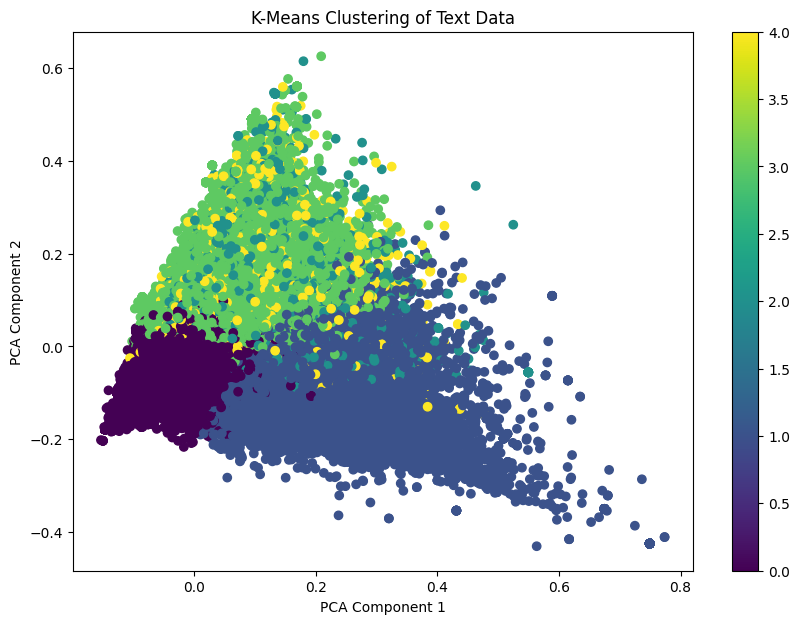

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.title('K-Means Clustering of Text Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the range of k values to try
k_values = range(1, 11)
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Print WCSS values
print("WCSS values for each k:", wcss)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


WCSS values for each k: [383158.637532152, 381092.2175039459, 379290.97612209624, 377709.3275276334, 376389.1754074326, 375013.933055407, 373748.4311813145, 372367.26855735685, 371618.7001672793, 370503.41222217]


<ipython-input-42-4bdacfdf1443>:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(k_values, wcss, 'bo-', marker='o')


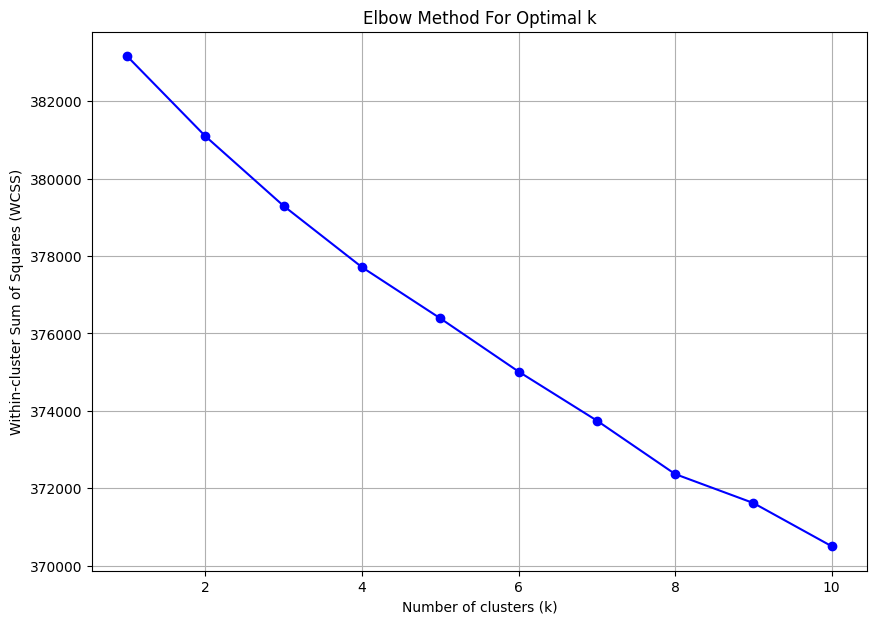

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(k_values, wcss, 'bo-', marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


   id     doc_id                                               text  cluster
0   0  2020338_0  small group politician believe strongly fact s...        8
1   1  2020338_1                                       lot oil iraq        8
2   2  2020338_2  tempt say u invade iraq lot oil u country deep...        0
3   3  2020338_3  think yuval pretty spot prove ground focal poi...        8
4   4  2874684_0  call area apiarist able help would likely remo...        3


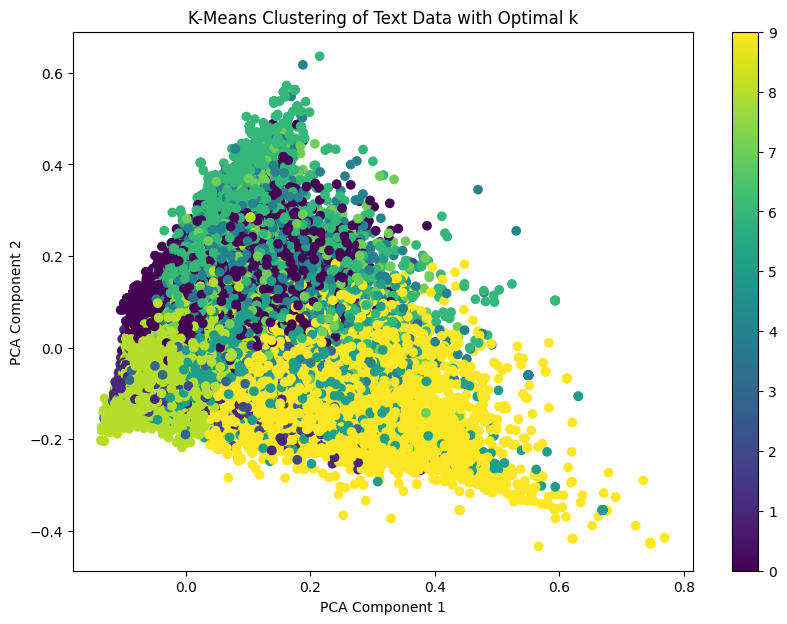

In [ ]:
# Based on the Elbow Method, choose the optimal number of clusters (e.g., 5)
optimal_k = 10

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# Add the cluster labels to the original DataFrame
cleandocs['cluster'] = kmeans.labels_
print(cleandocs.head())

# Visualize the clusters
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.title('K-Means Clustering of Text Data with Optimal k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()


In [ ]:
cleandocs['cluster'].value_counts()

cluster
8    238791
0     44261
9     29534
5     25667
4     17330
6     13601
7     12553
3      9111
2      7236
1      5582
Name: count, dtype: int64

#Topic Detection

In [ ]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer

# Load data
data = pd.read_csv('/content/drive/MyDrive/clean2_docs.csv')

data= data.dropna(subset=['text'])

print(data['text'].isnull().sum())


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(data['text'])


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation


# Define the range of topics
topics_range = range(2, 10)
perplexity_values = []
log_likelihood_values = []


for n_topics in topics_range:
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(dtm)
    perplexity_values.append(lda.perplexity(dtm))
    log_likelihood_values.append(lda.score(dtm))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(topics_range, perplexity_values, marker='o')
plt.title('Perplexity vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')

plt.subplot(1, 2, 2)
plt.plot(topics_range, log_likelihood_values, marker='o')
plt.title('Log Likelihood vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Log Likelihood')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Apply LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42) # You can change the number of topics
lda.fit(dtm)


In [ ]:
# Function to display topics
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

# Display topics
num_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), num_top_words)
